## Loading data from CSV file

In [1]:
import pandas as pd
import numpy as np
#from nltk import word_tokenize
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

%matplotlib notebook

In [2]:
Dataframe=pd.read_csv('data.csv')
Data=Dataframe.as_matrix()

## Visualizing the data

<IPython.core.display.Javascript object>


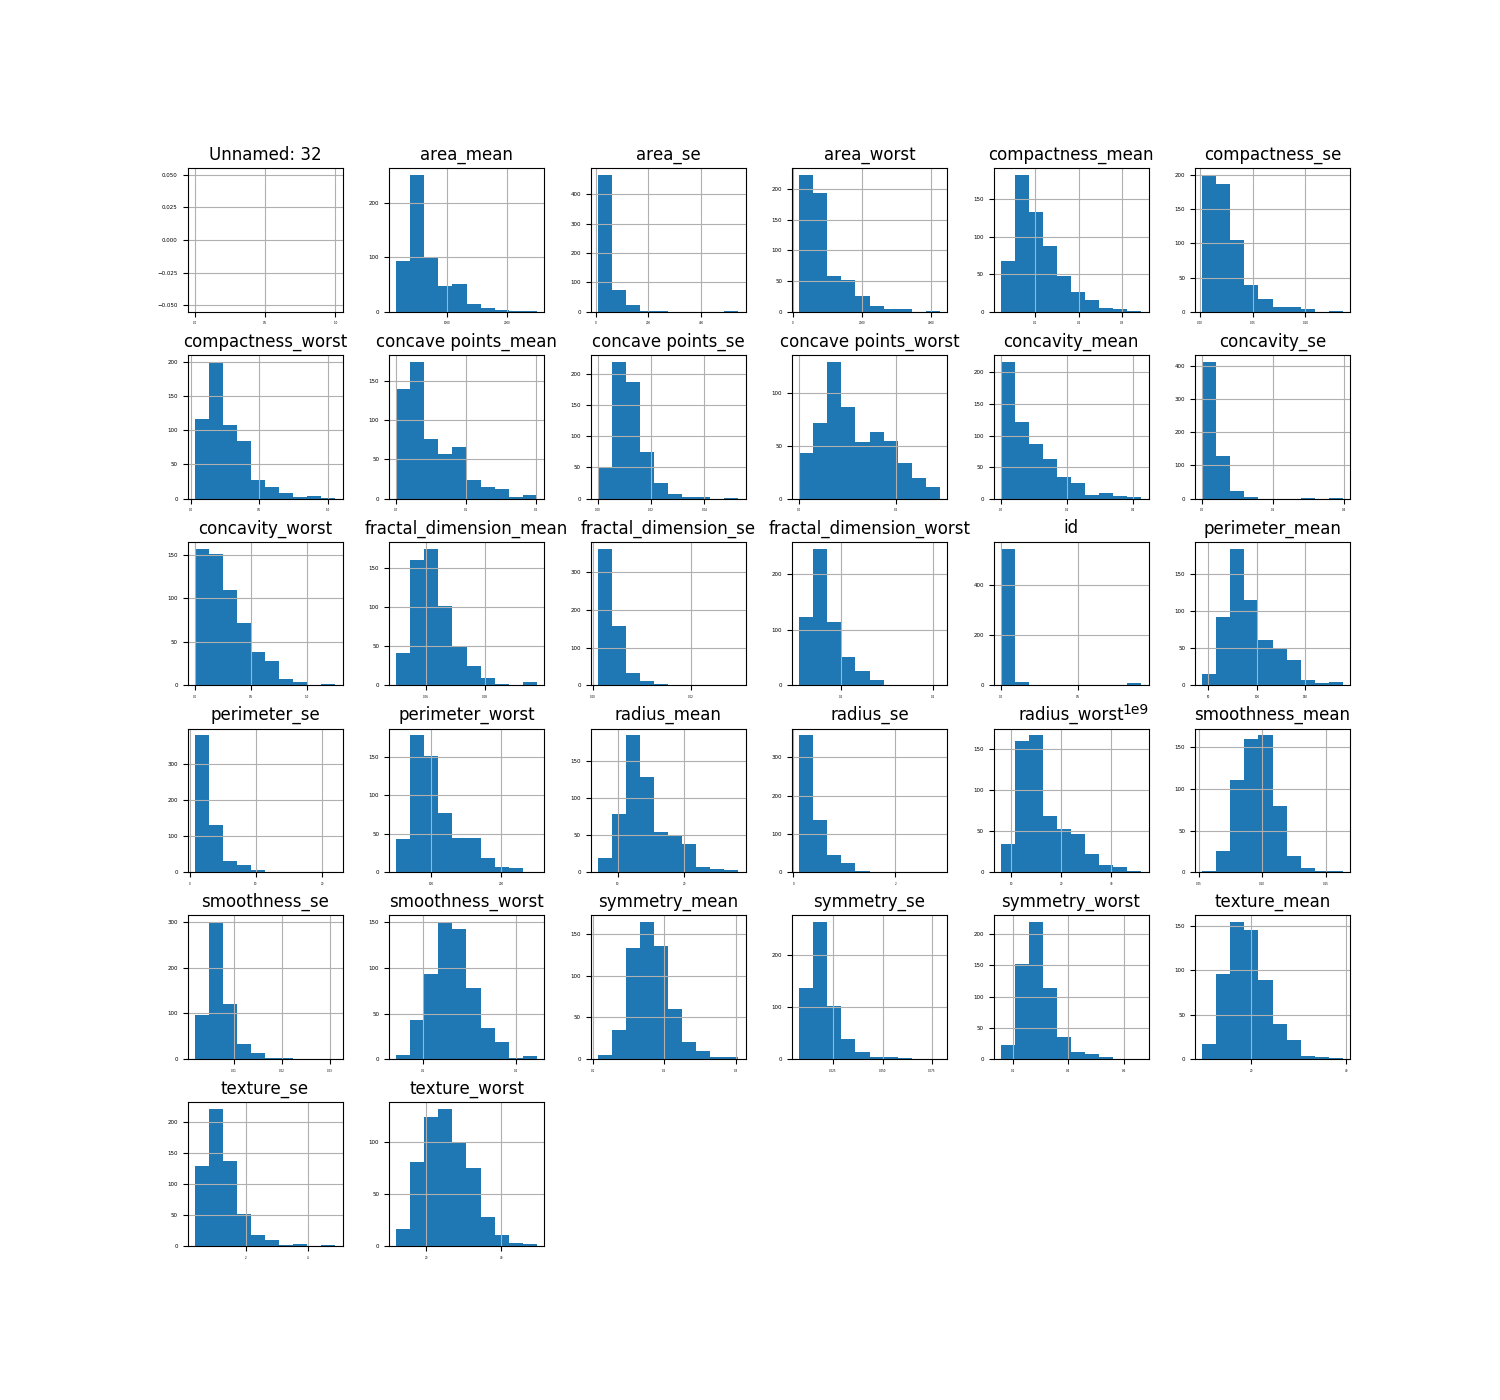

In [3]:
Dataframe.hist(xlabelsize=2,ylabelsize=4,figsize=(15,14),grid=True)
plt.show()

<IPython.core.display.Javascript object>


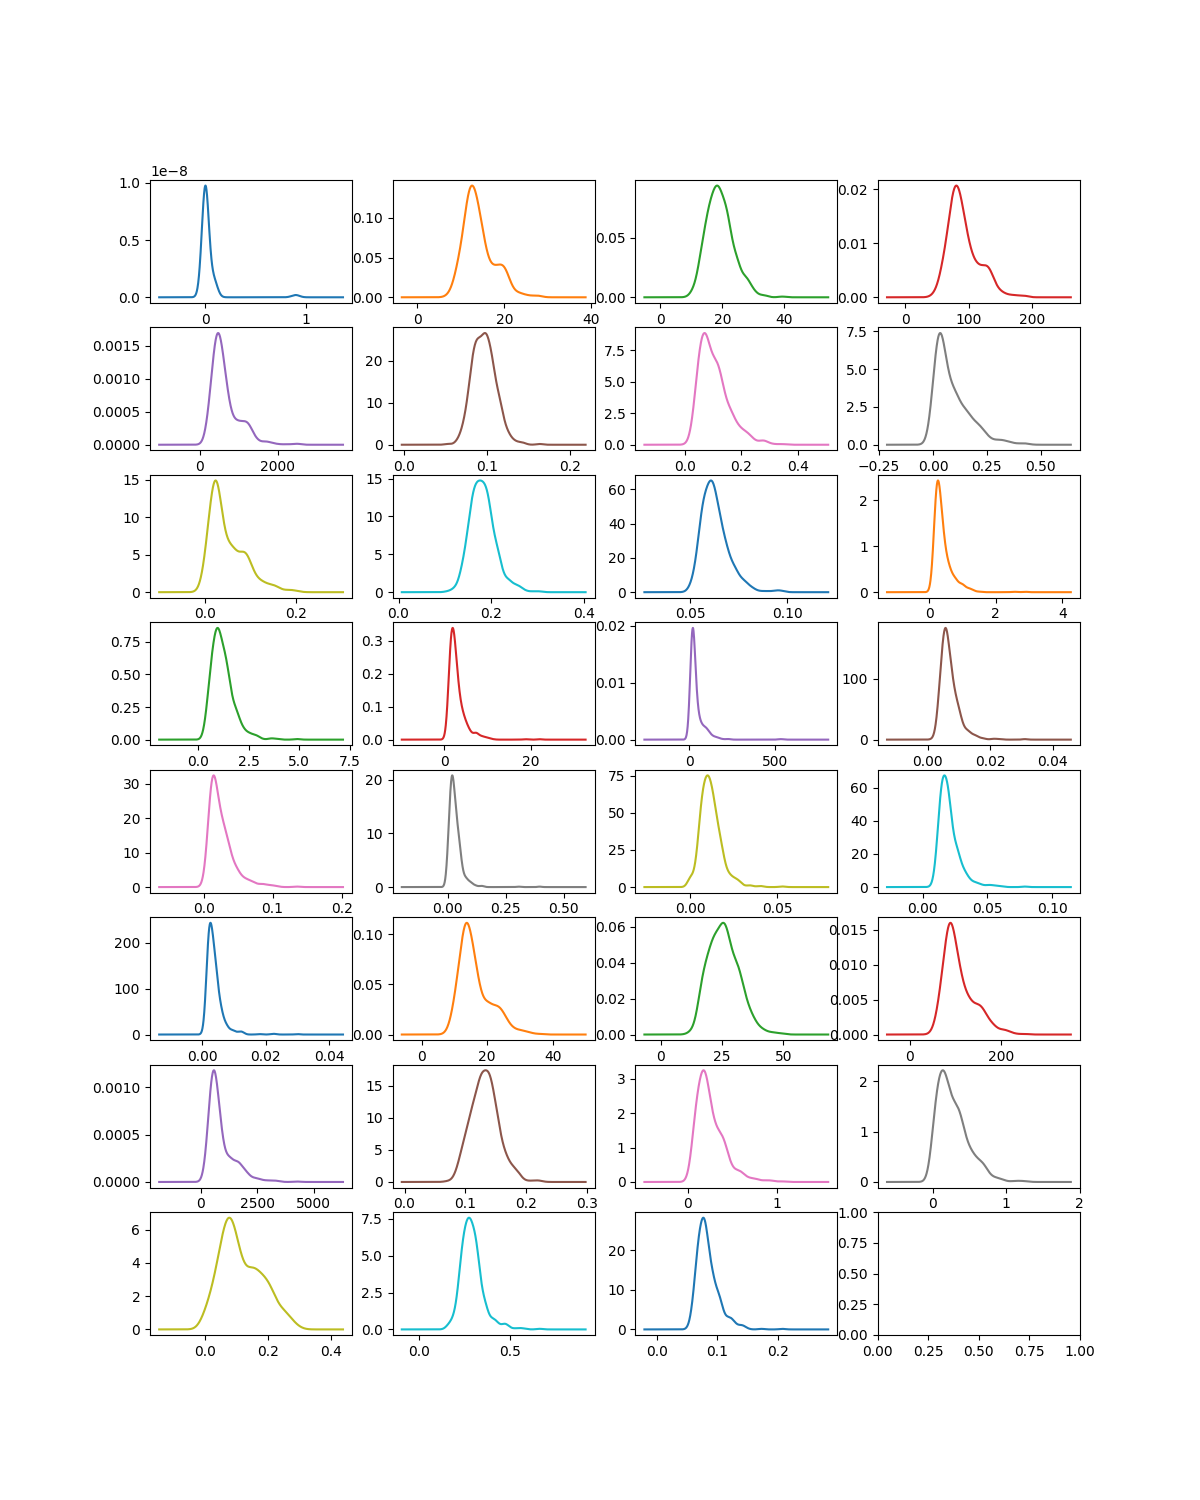

c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:1364: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:1365: RuntimeWarning: All-NaN slice encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:1366: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


In [4]:
try:
    Dataframe.plot(kind='density', subplots=True, layout=(8,4), sharex=False,figsize=(12,15))  ##Since last values are Nan put under try catch
except:
    pass
plt.show()

In [5]:
Dataset=[]
Labels=[]
for data in Data:
    Labels.append(data[1])
    data=data[2:len(data)-1]
    Dataset.append(data)

In [6]:
## Preprocessing
from sklearn import preprocessing

Data=np.array(Dataset)

min_max_scaler = preprocessing.MinMaxScaler()
Data_Normalized=min_max_scaler.fit_transform(Data)

c:\users\dwijraj\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Visualizing the data

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
array=pca.fit_transform(Data_Normalized)

array

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115],
       ...,
       [ 0.22631131, -0.28794577],
       [ 1.67783369,  0.33594595],
       [-0.90506804, -0.10410875]])

569


<IPython.core.display.Javascript object>


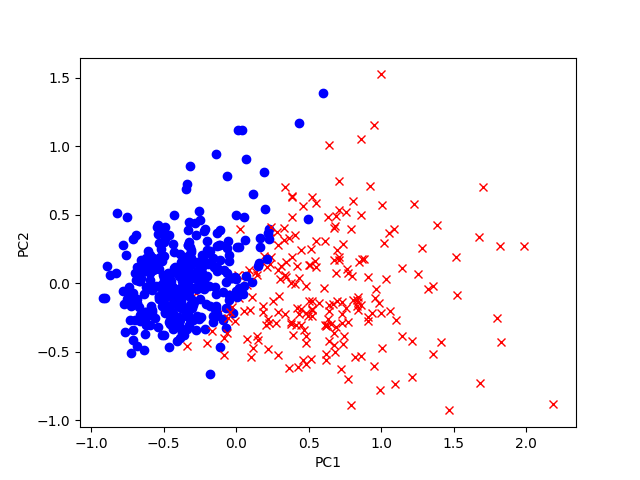

In [8]:
import matplotlib.pyplot as plt
#Using PCA
%matplotlib notebook
shape=Data_Normalized.shape
print(shape[0])
for i in range(569):
    if(Labels[i]=='M'):
        plt.plot(array[i][0],array[i][1],marker='x',color='r')
    else:
        plt.plot(array[i][0],array[i][1],marker='o',color='b')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [9]:
from sklearn.manifold import TSNE
#using TSNE
tsne = TSNE(n_components=2)
array=tsne.fit_transform(Data_Normalized)

array

array([[ -0.87439555,  31.275623  ],
       [-14.356041  ,  21.047121  ],
       [ -7.44821   ,  30.840002  ],
       ...,
       [ -9.668098  ,  12.452996  ],
       [ -4.2659435 ,  35.19884   ],
       [ -3.7235527 , -27.561092  ]], dtype=float32)

<IPython.core.display.Javascript object>


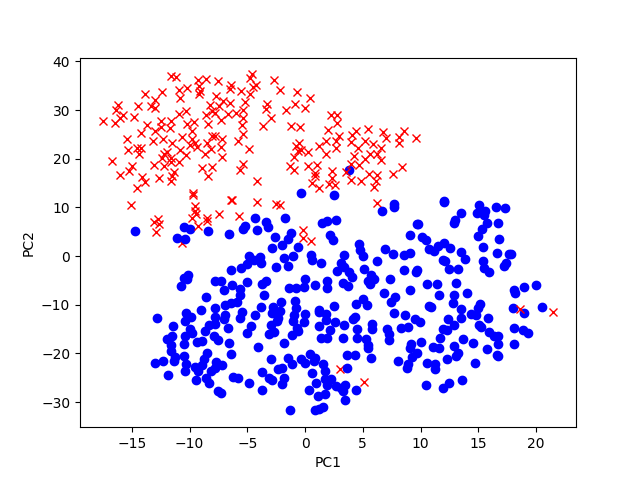

In [10]:
import matplotlib.pyplot as plt

%matplotlib notebook
shape=Data_Normalized.shape
for i in range(shape[0]):
    if(Labels[i]=='M'):
        plt.plot(array[i][0],array[i][1],marker='x',color='r')
    else:
        plt.plot(array[i][0],array[i][1],marker='o',color='b')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Converting data into sklearn algo compatible form

In [13]:
benign=[]
malignant=[]
for i in range(Data_Normalized.shape[0]):
    if(Labels[i]=='M'):
        benign.append(Data_Normalized[i])
    else:
        malignant.append(Data_Normalized[i])
print(len(benign))
print(len(malignant))

212
357


In [14]:
split=150
training_data=np.array(benign[:split]+malignant[:split])
testing_data=np.array(benign[split:]+malignant[split:])

training_labels=np.array([1 for i in range(split)]+[0 for i in range(split)])
testing_labels=np.array([1 for i in range(split,len(benign))]+[0 for i in range(split,len(malignant))])

print(training_data.shape)
print(testing_data.shape)
print(training_labels.shape)
print(testing_labels.shape)

(300, 30)
(269, 30)
(300,)
(269,)


## Support Vector Machine

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score   
import time as t
kernels=['linear','poly','rbf','sigmoid']
for k in kernels:
    clf1=SVC(kernel=k)
    a=t.time()
    print('Kernel Used',k)
    clf1.fit(training_data,training_labels)
    print('Training Accuracy'+str(f1_score(training_labels,clf1.predict(training_data))))
    print('Testing Accuracy'+str(f1_score(testing_labels,clf1.predict(testing_data))))
    print('Total time taken '+str(t.time()-a))

Kernel Used linear
Training Accuracy0.9696969696969697
Testing Accuracy0.9465648854961832
Total time taken 0.007020711898803711
Kernel Used poly
Training Accuracy0.15950920245398773
Testing Accuracy0.2028985507246377
Total time taken 0.013034820556640625
Kernel Used rbf
Training Accuracy0.9411764705882353
Testing Accuracy0.9508196721311476
Total time taken 0.010057687759399414
Kernel Used sigmoid
Training Accuracy0.9192982456140351
Testing Accuracy0.9586776859504132
Total time taken 0.01103067398071289
